Okay, in this notebook we will try to classify between the galaxy classes using two diffrint ways:
   1. Unsupervised learning
   2. Supervised learning

In [1]:
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt # for plotting
from sklearn.decomposition import PCA
import scipy.stats as st
import pandas as pd

### Call the data

In [2]:
%store -r auto_df_train 
%store -r auto_df_test
%store -r labels_train
%store -r labels_test
%store -r classes
%store -r pca_sample

---

### Unsupervised Learning

Now we need to find a way to

fix the mattching clustring.

In [3]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from scipy.optimize import linear_sum_assignment as linear_assignment

In [11]:
def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

def labelMap(vol, pred):
    cm = confusion_matrix(vol, pred)
    indexes = linear_assignment(_make_cost_m(cm))
    indexes = np.asarray(indexes)
    print(indexes)
    return indexes[1]
    
def convertLabels(lmap, pred):
    conv_preds = []
    for i in range(len(pred)):
        conv_preds.append(lmap[pred[i]])
    return np.array(conv_preds)

In [12]:
kmeans = KMeans(init="k-means++", n_clusters=4)
kmeans.fit(auto_df_train)
pred = kmeans.predict(auto_df_test)

In [18]:
colors = ['dodgerblue', 'orange', 'limegreen', 'magenta']


In [20]:
for seed in [6589,4598,2489,9434,7984,1238,6468,5165,3246,8646]:
    kmeans = KMeans(init="k-means++", n_clusters=4, random_state=seed)
    kmeans.fit(auto_df_train)
    pred = kmeans.predict(auto_df_test)
    total_report = {}
    lmap = labelMap(np.array(labels_test), pred)
    conv_preds = convertLabels(lmap, pred)
    question_report = precision_recall_fscore_support(y_pred=conv_preds, y_true=pred, average='weighted')
    cm = confusion_matrix(y_pred=conv_preds, y_true=pred)

    print(question_report)
    print(cm)
    total_report["precision"] = question_report[0]
    total_report['recall'] = question_report[1]
    total_report['f1'] = question_report[2]



    print('--------------------------------------------------------------')


[[0 1 2 3]
 [3 1 0 2]]
(0.2445, 0.2445, 0.2445, None)
[[  0   0   0 532]
 [  0 489   0   0]
 [845   0   0   0]
 [  0   0 134   0]]
--------------------------------------------------------------
[[0 1 2 3]
 [3 2 0 1]]
(0.0, 0.0, 0.0, None)
[[  0   0   0 534]
 [  0   0 843   0]
 [489   0   0   0]
 [  0 134   0   0]]
--------------------------------------------------------------
[[0 1 2 3]
 [1 0 2 3]]
(0.688, 0.688, 0.688, None)
[[  0 489   0   0]
 [135   0   0   0]
 [  0   0 534   0]
 [  0   0   0 842]]
--------------------------------------------------------------
[[0 1 2 3]
 [2 3 0 1]]
(0.0, 0.0, 0.0, None)
[[  0   0 533   0]
 [  0   0   0 843]
 [135   0   0   0]
 [  0 489   0   0]]
--------------------------------------------------------------
[[0 1 2 3]
 [2 0 1 3]]
(0.4225, 0.4225, 0.4225, None)
[[  0   0 489   0]
 [532   0   0   0]
 [  0 134   0   0]
 [  0   0   0 845]]
--------------------------------------------------------------
[[0 1 2 3]
 [3 2 1 0]]
(0.0, 0.0, 0.0, None)
[[  0 

In [14]:
report_df = pd.DataFrame.from_dict(total_report, orient='index')


In [8]:
report_df.head

<bound method NDFrame.head of                0
precision  0.667
recall     0.667
f1         0.667>

Like, are those results are even normal??
the variations are just too big, and also (can't remmeber)

### Supervised learning

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
sgd = SGDClassifier()

sgd.fit(auto_df_train, labels_train)

SGDClassifier()

In [29]:
def plot_confusion_matrix(predictions, input_data, input_labels, classes):
    
    # Compute the confusion matrix by comparing the test labels (ds.test_labels) with the test predictions
    cm = metrics.confusion_matrix(input_labels, predictions, labels=[0, 1, 2, 3])
    cm = cm.astype('float')

    # Normalize the confusion matrix results. 
    cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
    
    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.matshow(cm_norm)

    plt.title('Confusion matrix', y=1.08)
    
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(classes)
    
    ax.set_yticks([0, 1, 2, 3])
    ax.set_yticklabels(classes)

    plt.xlabel('Predicted')
    plt.ylabel('True')

    fmt = '.2f'
    thresh = cm_norm.max() / 2.
    for i in range(cm_norm.shape[0]):
        for j in range(cm_norm.shape[1]):
            ax.text(j, i, format(cm_norm[i, j], fmt), 
                    ha="center", va="center", 
                    color="white" if cm_norm[i, j] < thresh else "black")
    plt.show()

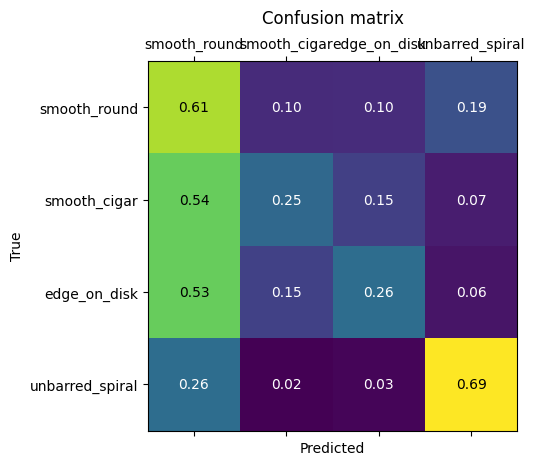

In [30]:
y_predict = sgd.predict(auto_df_test)

plot_confusion_matrix(y_predict, auto_df_test, labels_test, classes)


In [ ]:
print()

Question